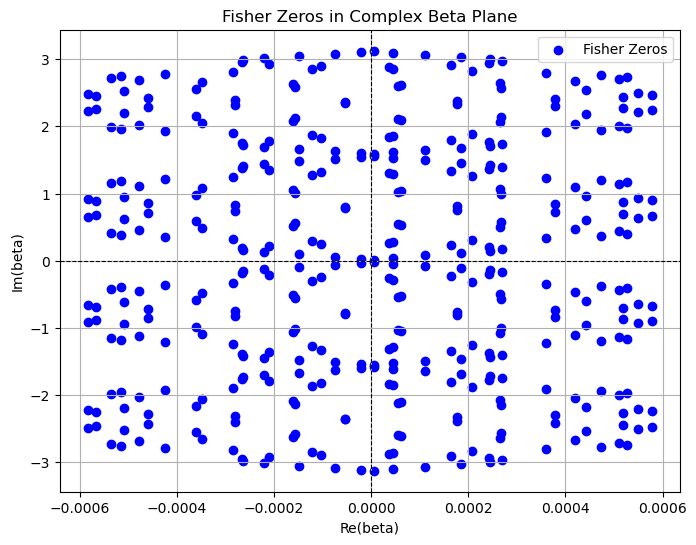

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 10  # Lattice size (LxL)
N = L * L  # Total number of spins
J = 1  # Coupling constant

# Energy levels and magnetization levels
energy_levels = np.arange(-2 * J * N, 2 * J * N + 4, 4)  # Discrete energy levels
magnetization_levels = np.arange(-N, N + 2, 2)  # Discrete magnetization levels

# Initialize density of states g(E, M)
g = np.zeros((len(energy_levels), len(magnetization_levels)))
histogram = np.zeros_like(g)

# Initialize spin lattice randomly
spins = np.random.choice([-1, 1], size=(L, L))

# Helper functions
def calculate_energy(spins):
    """Calculate total energy of the lattice."""
    energy = -J * sum(
        spins[i, j] * (spins[(i + 1) % L, j] + spins[i, (j + 1) % L])
        for i in range(L)
        for j in range(L)
    )
    return energy

def calculate_magnetization(spins):
    """Calculate total magnetization of the lattice."""
    return np.sum(spins)

def index_mapping(value, array):
    """Map a value to its index in an array."""
    return np.argmin(np.abs(array - value))

# Wang-Landau algorithm
f_factor = np.exp(1.0)
flatness_criterion = 0.8

while f_factor > 1e-8:
    histogram.fill(0)
    
    while True:
        # Randomly select a spin and flip it
        i, j = np.random.randint(0, L), np.random.randint(0, L)
        spins[i, j] *= -1
        
        # Calculate new energy and magnetization
        E_new = calculate_energy(spins)
        M_new = calculate_magnetization(spins)
        
        # Map to indices
        E_idx = index_mapping(E_new, energy_levels)
        M_idx = index_mapping(M_new, magnetization_levels)
        
        # Acceptance criterion
        if np.random.rand() < min(1.0, np.exp(g[E_idx, M_idx] - g[E_idx, M_idx])):
            pass  # Accept move
        else:
            spins[i, j] *= -1  # Reject move
        
        # Update DOS and histogram
        g[E_idx, M_idx] += f_factor
        histogram[E_idx, M_idx] += 1
        
        # Check histogram flatness
        if np.min(histogram[histogram > 0]) > flatness_criterion * np.mean(histogram[histogram > 0]):
            break
    
    f_factor /= 2.0

# Marginalize over magnetization to get g(E)
g_E = np.sum(np.exp(g), axis=1)

# Normalize energy levels to start from zero
min_energy = int(np.min(energy_levels))
normalized_energy_levels = energy_levels - min_energy

# Construct Z(beta): Polynomial in z with coefficients from g(E)
coefficients_length = int(normalized_energy_levels[-1]) + 1
coefficients = np.zeros(coefficients_length)

for i, E in enumerate(normalized_energy_levels):
    coefficients[int(E)] += g_E[i]

# Find roots of Z(z) where z corresponds to exp(-beta)
roots_z = np.roots(coefficients)

# Convert roots into beta values: beta corresponds to ln(z)
roots_beta_real = -np.log(np.abs(roots_z))
roots_beta_imaginary = np.angle(roots_z)

# Plot Fisher zeros in terms of beta in the complex plane
plt.figure(figsize=(8, 6))
plt.scatter(roots_beta_real, roots_beta_imaginary, color='blue', label="Fisher Zeros")
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel("Re(beta)")
plt.ylabel("Im(beta)")
plt.title("Fisher Zeros in Complex Beta Plane")
plt.legend()
plt.grid()
plt.show()


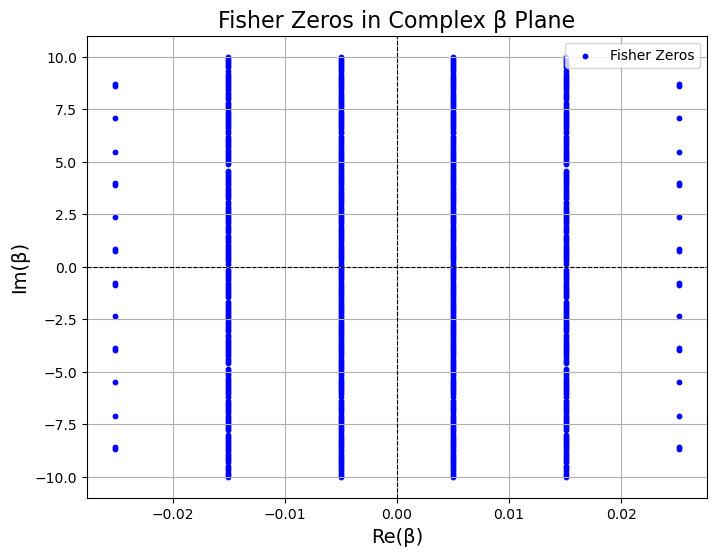

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 10  # Lattice size (LxL)
N = L * L  # Total number of spins
J = 1  # Coupling constant

# Energy levels (mock example; replace with actual Wang-Landau results)
energy_levels = np.arange(-2 * J * N, 2 * J * N + 4, 4)  # Discrete energy levels

# Define a grid in the complex beta plane
beta_real = np.linspace(-1, 1, 200)  # Real part of beta
beta_imaginary = np.linspace(-10, 10, 200)  # Imaginary part of beta
beta_real_grid, beta_imag_grid = np.meshgrid(beta_real, beta_imaginary)
beta_grid = beta_real_grid + 1j * beta_imag_grid

# Compute Z(beta) on the grid
Z_beta = np.zeros_like(beta_grid, dtype=np.complex128)

for i, E in enumerate(energy_levels):
    Z_beta += g_E[i] * np.exp(-beta_grid * E)

# Compute magnitude of Z(beta)
Z_magnitude = np.abs(Z_beta)

# Identify zeros numerically (where |Z(beta)| is close to zero)
threshold = np.percentile(Z_magnitude.flatten(), q=2)  # Adjust threshold if needed
zeros_real = beta_real_grid[np.where(Z_magnitude < threshold)]
zeros_imaginary = beta_imag_grid[np.where(Z_magnitude < threshold)]

# Plot Fisher zeros in the complex beta plane
plt.figure(figsize=(8, 6))
plt.scatter(zeros_real, zeros_imaginary, color='blue', s=10, label="Fisher Zeros")
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel("Re(β)", fontsize=14)
plt.ylabel("Im(β)", fontsize=14)
plt.title("Fisher Zeros in Complex β Plane", fontsize=16)
plt.legend()
plt.grid()
plt.show()
